# A/B Testing 

A/B tests test changes on a web page by running an experiment where a **control group** sees the old version while the **experiment group** sees the new version. A metric is then chosen to measure the level of engagement from users in each group. These results are then used to judge whether one version is more effective than the other. A/B testing is very much like hypothesis testing with the following hypotheses:

- **Null Hypothesis:** The new version is no better, or even worse, than the old version
- **Alternative Hypothesis:** The new version is better than the old version

If we fail to reject the null hypothesis, the results would suggest keeping the old version. If we reject the null hypothesis, the results would suggest launching the change. These tests can be used for a wide variety of changes, from large feature additions to small adjustments in color, to see what change maximizes your metric the most.

A/B testing also has its drawbacks. It can help you compare two options, but it can't tell you about an option you haven’t considered. It can also produce bias results when tested on existing users due to factors like change aversion and novelty effect.

- **Change Aversion** Existing users may give an unfair advantage to the old version simply because they are unhappy with the change, even if it’s ultimately for the better.
- **Novelty Effect:** Existing users may give an unfair advantage to the new version because they’re excited or drawn to the change, even if it isn’t any better in the long run. You'll learn more about factors like these later.

## Case Study:
In this case study, you’ll analyze the A/B test results for Audacity. Here's the customer funnel for typical new users on their site:

View home page > Explore courses > View course overview page > Enroll in course > Complete course

### Experiment I:
The first change Audacity wants to try is on their homepage. They hope that this new, more engaging design will increase the number of users who explore their courses and move on to the second stage of the funnel.

The metric we will use is the click-through rate for the Explore Courses button on the home page. Click-through rate (CTR) is often defined as the number of clicks divided by the number of views. Since Audacity uses cookies, we can identify unique users and make sure we don't count the same one multiple times. For this experiment, we'll define our click-through rate as:

CTR: # clicks by unique users / # views by unique users

Now that we have our metric, let's set up our null and alternative hypotheses:

$$H_{0}: CTR_{new} \leqslant CTR _{old} $$

$$H_{1}: CTR_{new} > CTR _{old} $$

Our alternative hypothesis is what we want to prove to be true. In this case, the new homepage design has a higher click-through rate than the old homepage design. And the null hypothesis is what we assume to be true before analyzing data, which is that the new homepage design has a click-through rate that is less than or equal to that of the old homepage design. As you’ve seen before, we can rearrange our hypotheses to look like this:

$$H_{0}: CTR_{new} - CTR _{old} \leqslant 0 $$

$$H_{1}: CTR_{new} - CTR _{old} > 0 $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('support-files/13_Case-Study-AB-Tests/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


#### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [3]:
# convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8188 non-null   datetime64[ns]
 1   id         8188 non-null   int64         
 2   group      8188 non-null   object        
 3   action     8188 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 256.0+ KB


In [4]:
# total number of actions
df['action'].count()

8188

In [5]:
# number of unique users
df['id'].nunique()

6328

In [6]:
# df containing only the unique users
df_unique = df.drop_duplicates(subset=['id'])
df_unique.shape

(6328, 4)

In [7]:
# size of control group
df_unique.query('group == "control"').count()[0]

3332

In [8]:
# another possibility for the size of control group
df.query('group == "control"')['id'].nunique()

3332

In [9]:
# size of experiment group
df_unique.query('group == "experiment"').count()[0]

2996

In [10]:
# another possibility for the size of control group
df.query('group == "experiment"')['id'].nunique()

2996

In [11]:
# checking to see if everyone is accounted for
df_unique.query('group == "control"').count()[0] + df_unique.query('group == "experiment"').count()[0] == df_unique.shape[0]

True

#### 2. How long was the experiment run for? 
> Hint: the records in this dataset are ordered by timestamp in increasing order

In [12]:
duration = df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]
type(duration)

pandas._libs.tslibs.timedeltas.Timedelta

[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.isoformat.html) on dealing with pandas Timedeltas

In [13]:
# duration of this experiment
duration.days # about four months

115

#### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [14]:
# action types in this experiment
df['action'].unique()

array(['view', 'click'], dtype=object)

#### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

- The control and experiment pages could have different numbers of total visitors
- More total clicks could occur in one version, even if there is a greater percentage of clicks in the other version

#### 5. Define the click through rate (CTR) for this experiment.

CTR = # clicks by unique users / # unique users 

#### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: CTR_{new} - CTR_{old} \leqslant 0 $$

$$H_1: CTR_{new} - CTR_{old} > 0 $$

#### 7. Results

In [15]:
# retriving the control group from the original dataset
control_df = df.query('group == "control"')

In [16]:
# checking to see the types of actions before calculating the click through rate (CTR)
control_df['action'].unique()

array(['view', 'click'], dtype=object)

In [17]:
# getting the click through rate for the control group
control_ctr = control_df.query('action == "click"')['id'].nunique() / control_df.query('action == "view"')['id'].nunique()
control_ctr # about 28%

0.2797118847539016

In [18]:
# retriving the experiment group from the original dataset
experiment_df = df.query('group == "experiment"')

In [19]:
# getting the click through rate for the experiment group
experiment_ctr = experiment_df.query('action == "click"')['id'].nunique() / experiment_df.query('action == "view"')['id'].nunique()
experiment_ctr # about 31%

0.3097463284379172

In [20]:
# difference between CTRs
obs_diff = experiment_ctr - control_ctr
obs_diff # about 3%

0.030034443684015644

In [21]:
# now, we have to see if this difference is significant, and not just due to chance
# bootstrap the sample to simulate the sampling distribution for the difference in proportions

diffs = []

for _ in range(int(1e4)):
    bootsample = df.sample(df.shape[0], replace=True) # bootstrap the WHOLE sample (df.shape[0])
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"')['id'].nunique() / control_df.query('action == "view"')['id'].nunique()
    experiment_ctr = experiment_df.query('action == "click"')['id'].nunique() / experiment_df.query('action == "view"')['id'].nunique()
    diffs.append(experiment_ctr - control_ctr)

In [22]:
# the p-value for our statistic, which is the observed difference in proportions 
# by simulating the distribution under the null hypothesis and then finding the probability
# that our statistic came from this distribution 

# simulating from the null creating a normal distribution centered at zero
# with the same standard deviation as our sampling distribution above 

diffs = np.array(diffs)
null_vals= np.random.normal(0, np.std(diffs), diffs.size)

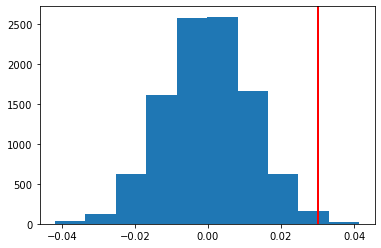

In [23]:
# this is the null distribution
plt.hist(null_vals)
# and this is where our observed statistic falls 
plt.axvline(obs_diff, color='r', linewidth=2);

In [24]:
# the p-value will then be all the null values that are more extreme than
# our statistic in favor of the alternative
(null_vals > obs_diff).mean()

0.0059

With a p-value of approximately 0.6%, the difference in CTR for the control and the experiment group does appear to be significant. If we have, for instance, an $\alpha$ of 1%, we can **reject $H_{0}$**. In our example, it certainly looks like Audacity should launch the new version of the home page. 

### Experiment 2:

The second change, Audacity is A/B testing is a more career-focused description on a course overview page. They hope that this change may encourage more users to enroll and complete this course. In this experiment, we’re going to analyze the following metrics:

1. **Enrollment Rate:** Click-through rate for the Enroll button on the course overview page
2. **Average Reading Duration:** Average number of seconds spent on the course overview page
3. **Average Classroom Time:** Average number of days spent in the classroom for students enrolled in the course
4. **Completion Rate:** Course completion rate for students enrolled in the course
First, let's determine if the difference observed for each metric is statistically significant individually.

### 1. Metric: Enrollment rate
#### Question: Does one page lead users to more enrollments?

In [25]:
np.random.seed(42)
df = pd.read_csv('support-files/13_Case-Study-AB-Tests/course_page_actions.csv')
df.head(1)

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004


In [26]:
# retriving the control group from the original dataset
control_df = df.query('group == "control"')

# checking to see the types of actions before calculating the click through rate (CTR)
control_df['action'].unique()

array(['view', 'enroll'], dtype=object)

In [27]:
# get the click through rate for the control group
control_ctr = control_df.query('action == "enroll"')['id'].nunique() / control_df.query('action == "view"')['id'].nunique()

# display ctr
control_ctr

0.2364438839848676

In [28]:
# retriving the experiment group from the original dataset
experiment_df = df.query('group == "experiment"')

# get the click through rate for the experiment group
experiment_ctr = experiment_df.query('action == "enroll"')['id'].nunique() / experiment_df.query('action == "view"')['id'].nunique()

# display ctr
experiment_ctr

0.2668693009118541

In [29]:
# get the observed difference in CTRs
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030425416926986526

In [30]:
# now, we have to see if this difference is significant, and not just due to chance
# bootstrap the sample to simulate the sampling distribution for the difference in proportions

diffs = []

for _ in range(int(1e4)):
    bootsample = df.sample(df.shape[0], replace=True) # bootstrap the WHOLE sample (df.shape[0])
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"')['id'].nunique() / control_df.query('action == "view"')['id'].nunique()
    experiment_ctr = experiment_df.query('action == "enroll"')['id'].nunique() / experiment_df.query('action == "view"')['id'].nunique()
    diffs.append(experiment_ctr - control_ctr)

In [31]:
# the p-value for our statistic, which is the observed difference in proportions 
# by simulating the distribution under the null hypothesis and then finding the probability
# that our statistic came from this distribution 

# simulating from the null creating a normal distribution centered at zero
# with the same standard deviation as our sampling distribution above 

diffs = np.array(diffs)
null_vals = np.random.normal(0, np.std(diffs), diffs.size)

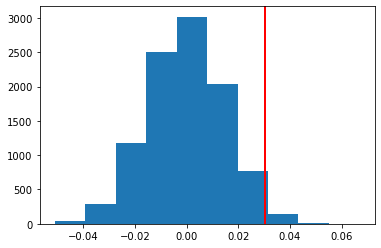

In [32]:
# this is the null distribution
plt.hist(null_vals)
# and this is where our observed statistic falls 
plt.axvline(obs_diff, color='r', linewidth=2);

In [33]:
# the p-value will then be all the null values that are more extreme than
# our statistic in favor of the alternative
t1 = (null_vals > obs_diff).mean()
t1

0.0188

With a p-value of approximately 2.07%, the difference in CTR for the control and the experiment group does appear to be significant. If we have a type I error rate ($\alpha$) of 5%, we can **reject $H_{0}$**. In our example, it certainly looks like Audacity should use the experimental description on its overview page.

### 2. Metric: Average Reading Duration
#### Question: Does one page engage users for a longer period of time?

In [34]:
# with this metric, we'll be anaylyzing difference in means
np.random.seed(42)
df = pd.read_csv('support-files/13_Case-Study-AB-Tests/course_page_actions.csv')

In [35]:
# since we're comparing reading duration, we only care about view actions
views = df.query('action == "view"')

In [36]:
# count only each unique user once by finding their average reading duration
# if they visited the site more than once
reading_times = views.groupby(['id', 'group'])['duration'].mean()

In [37]:
# resetting the indexes just so we keep the ID and group as column names
reading_times = reading_times.reset_index()
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [38]:
# finding the average reading durations for each group
control_mean = reading_times.query('group == "control"')['duration'].mean()
experiment_mean = reading_times.query('group == "experiment"')['duration'].mean()
control_mean, experiment_mean

(115.38637100678449, 131.32084104717944)

In [39]:
# finding the difference of means
obs_diff = experiment_mean - control_mean
obs_diff # users spent almost 16s more on the overview page in the experimental version

15.934470040394956

In [40]:
# now, we have to see if this difference is significant, and not just due to chance
# bootstrap the sample to simulate the sampling distribution for the difference in means

diffs = []

for _ in range(int(1e4)):
    bootsample = reading_times.sample(reading_times.shape[0], replace=True)
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_mean = control_df['duration'].mean()
    experiment_mean = experiment_df['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [41]:
# the p-value for our statistic, which is the observed difference in proportions 
# by simulating the distribution under the null hypothesis and then finding the probability
# that our statistic came from this distribution 
diffs = np.array(diffs)
null_vals = np.random.normal(0, np.std(diffs), diffs.size)

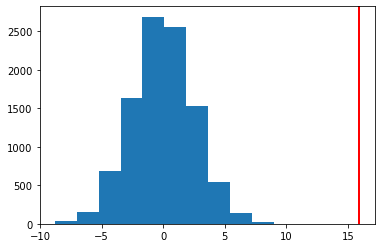

In [42]:
# this is the null distribution
plt.hist(null_vals)
# and this is where our observed statistic falls 
plt.axvline(obs_diff, color ='r', linewidth=2);

In [43]:
# the p-value will then be all the null values that are more extreme than
# our statistic in favor of the alternative
t2 = (null_vals > obs_diff).mean()
t2

0.0

With a p-value of 0%, the difference in means for the control and the experiment group does appear to be significant. If we have a type I error rate ($\alpha$) of 5%, we can **reject $H_{0}$**.

### 3. Metric: Average Classroom Time
#### Question: Does one page engage users for a longer period of time?

In [44]:
df = pd.read_csv('support-files/13_Case-Study-AB-Tests/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [45]:
# the total_days column represents the total amount of time each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group == "control"')['total_days'].mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"')['total_days'].mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [46]:
# observed difference in average classroom time 
obs_diff = experiment_mean - control_mean
obs_diff

1.3026031488719099

In [47]:
# checking if this diference is significant by bootstraping

diffs = []

for _ in range(int(1e4)):
    bootsample = df.sample(df.shape[0], replace=True)
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_mean = control_df['total_days'].mean()
    experiment_mean = experiment_df['total_days'].mean()
    diffs.append(experiment_mean - control_mean)

In [48]:
diffs = np.array(diffs)

# we can find the p-value simulating the difference in means under the null hypothesis 
# and then finding the probability that our statistic come from this distribution
null_vals = np.random.normal(0, np.std(diffs), diffs.size)

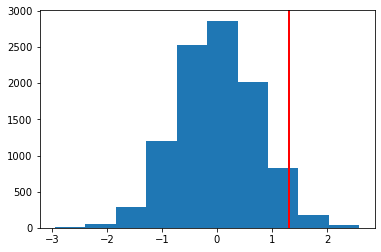

In [49]:
# this is the null distribution
plt.hist(null_vals)
# this is where the observed difference in means falls on the distribution
plt.axvline(obs_diff, color='r', linewidth=2);

In [50]:
# finally, finding the probability that our statistic came from this distribution (p-value)
t3 = (null_vals > obs_diff).mean()
t3

0.0361

With a p-value of approximately 4%, the difference in means for the control and the experiment group does appear to be significant. If we have a type I error rate ($\alpha$) of 5%, we can **reject $H_{0}$**. In order words, the hypothesis test above provides evidence that users spend more time in the classroom after seeing the experimental description in the course overview page.

While the difference is *statistically significant*, it might not be *practically* so. Engaging students for 1.3 more days in the classroom, when they average around 74 days in total, doesn't seem to indicate a large enough value to launch this change from a practical perspective for Audacity.

### 4. Metric: Completion Rate
#### Question: Does one page influence more completion rate than the other?

In [51]:
df = pd.read_csv('support-files/13_Case-Study-AB-Tests/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [52]:
# control dataset
control_df = df.query('group == "control"')

# control completion rate
control_cr = control_df['completed'].mean()
control_cr

0.3719951923076923

In [53]:
# experiment dataset
experiment_df = df.query('group == "experiment"')

# experiment completion rate
experiment_cr = experiment_df['completed'].mean()
experiment_cr

0.3935334872979215

In [54]:
# difference of completion rates means
obs_diff = experiment_cr - control_cr
obs_diff

0.02153829499022919

In [55]:
# checking if this difference is significant by bootstraping

diffs = []

for _ in range(int(1e4)):
    bootsample = df.sample(df.shape[0], replace=True)
    control_df = bootsample.query('group == "control"')
    experiment_df = bootsample.query('group == "experiment"')
    control_cr = control_df['completed'].mean()
    experiment_cr = experiment_df['completed'].mean()
    diffs.append(experiment_cr - control_cr)

In [56]:
diffs = np.array(diffs)

# we can find the p-value simulating the difference in means under the null hypothesis 
# and then finding the probability that our statistic come from this distribution
null_vals = np.random.normal(0, np.std(diffs), diffs.size)

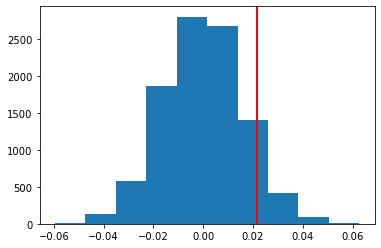

In [57]:
# this is the null distribution
plt.hist(null_vals)
# this is where the observed difference in completion rate means fall on the null distribution
plt.axvline(obs_diff, color='r', linewidth=2);

In [58]:
# finally, finding the probability that our statistic came from this distribution (p-value)
t4 = (null_vals > obs_diff).mean()
t4

0.0886

With a p-value of approximately 9.6%, the difference in means for the control and the experiment group doesn't appear to be significant. If we have a type I error rate ($\alpha$) of 5%, we **fail to reject $H_{0}$**. In order words, the hypothesis test above doesn't provide evidence that the experimental page is more effective in improving completion rate. 

### Anayzing Multiple Metrics
The more metrics you evaluate, the more likely you are to observe significant differences just by chance.

The [Bonferroni Correction](http://en.wikipedia.org/wiki/Bonferroni_correction) is one way we could handle experiments with multiple tests or metrics in this case. To compute the new Bonferroni correct alpha value, we need to divide the original alpha value by the number of tests.

#### Question: If our original alpha value was 0.05, what would be our new, Bonferroni corrected alpha value, considering we had four tests?

In [59]:
# new alpha
bonf_alpha = 0.05/4
bonf_alpha

0.0125

#### Question: What results are still statistically significant using the new alpha? 

1. **Enrollment Rate:** not significant anymore, we **fail to reject $H_{0}$**
2. **Average Reading Duration:** still statistically significant, even under the corrected alpha we **reject $H_{0}$**
3. **Average Classroom Time:** not significant anymore, we **fail to reject $H_{0}$**
4. **Completion Rate:** still not statistically significant, we **fail to reject $H_{0}$**

In [60]:
# enrollment rate: not significant anymore, we fail to reject H0
t1, bonf_alpha, t1 < bonf_alpha

(0.0188, 0.0125, False)

In [61]:
# average reading duration: still statistically significant, even under the corrected alpha
# we reject H0
t2, bonf_alpha, t2 < bonf_alpha

(0.0, 0.0125, True)

In [62]:
# average classroom time: not significant anymore, we fail to reject H0
t3, bonf_alpha, t3 < bonf_alpha 

(0.0361, 0.0125, False)

In [63]:
# completion rate: still not statistically significant, we fail to reject H0
t4, bonf_alpha, t4 < bonf_alpha

(0.0886, 0.0125, False)

### Drawing Conclusions
Since the Bonferroni method is too conservative when we expect correlation among metrics, we can better approach this problem with more sophisticated methods, such as the [closed testing procedure](http://en.wikipedia.org/wiki/Closed_testing_procedure), [Boole-Bonferroni bound](http://en.wikipedia.org/wiki/Bonferroni_bound), and the [Holm-Bonferroni method](http://en.wikipedia.org/wiki/Holm%E2%80%93Bonferroni_method). These are less conservative and take this correlation into account.

If you choose to use a less conservative method, make sure the assumptions of that method are truly met in your situation and that you're not just trying to [cheat on a p-value](http://freakonometrics.hypotheses.org/19817). Choosing a poorly suited test to get significant results will only lead to misguided decisions that harm your company's performance in the long run.

### Difficulties to consider when running A/B Tests

- Novelty effect and change aversion when existing users first experience a change
- Sufficient traffic and conversions to have significant and repeatable results
- The best metric choice for making the ultimate decision (eg. measuring revenue vs. clicks)
- Long enough run time for the experiment to account for changes in behavior based on time of day/week or seasonal events.
- The practical significance of a conversion rate (the cost of launching a new feature vs. the gain from the increase in conversion)
-  Consistency among test subjects in the control and experiment group (imbalance in the population represented in each group can lead to situations like Simpson's Paradox)